In [1]:
import os
import numpy as np
import cv2
from glob import glob
from PIL import Image
import pandas as pd

import torch
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# !unrar x "/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/Dataset_BenhVien_DHYD_toLGG_Processing.rar" "/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/"
# !unrar x "/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m.rar" "/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/"


In [ ]:
%cd /content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/Detect_Brain/yolo/yolov5
!pip install -r requirements.txt 
# restart runtime
os.kill(os.getpid(), 9)

In [2]:
%cd /content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/Detect_Brain/yolo/yolov5
#Load model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt')

/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/Detect_Brain/yolo/yolov5


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-6-18 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients
Adding AutoShape... 


Load df

In [3]:
mask_files = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m/*/*_mask*')
train_files = [file.replace('_mask', '') for file in mask_files]
print(train_files)
print(mask_files)
print(len(train_files))
print(len(mask_files))

['/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10.tif', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12.tif', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13.tif', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14.tif', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15.tif', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_16.tif', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHo

In [ ]:
def diagnosis(mask_path):
  value = np.max(cv2.imread(mask_path))
  return 1 if value > 0 else 0

# print(len('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/Dataset_BenhVien_DHYD_toLGG_Processing/')) #108
START_NAME = 108
LEN_NAME = 35 

def patient(mask_path, START_NAME, LEN_NAME):
  return mask_path[START_NAME:START_NAME+LEN_NAME]

df = pd.DataFrame({"patient": [patient(x, START_NAME, LEN_NAME) for x in mask_files],
                   "image_path": train_files,
                   "mask_path": mask_files
                  #  ,"diagnosis":[diagnosis(x) for x in mask_files]
                   })
df

,patient,image_path,mask_path
0,BÀNH THỊ DIỆU/Series_005_Ax T2,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...
1,BÀNH THỊ DIỆU/Series_005_Ax T2,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...
2,BÀNH THỊ DIỆU/Series_005_Ax T2,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...
3,BÀNH THỊ DIỆU/Series_005_Ax T2,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...
4,BÀNH THỊ DIỆU/Series_005_Ax T2,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...
...,...,...,...
2150,ĐỖ THỊ THÚY VÂN/Series_008_Ax,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...
2151,ĐỖ THỊ THÚY VÂN/Series_008_Ax,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...
2152,ĐỖ THỊ THÚY VÂN/Series_008_Ax,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...
2153,ĐỖ THỊ THÚY VÂN/Series_008_Ax,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...


**Crop**

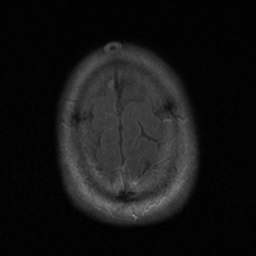

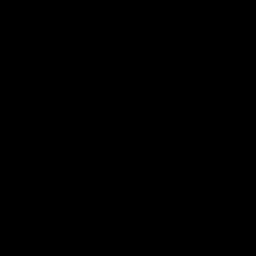

In [10]:
#Test predict
img_path = '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_21.tif'
mask_path = '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_21_mask.tif'
img_test = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
mask_test = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)

results = model(img_test, size=512)
from google.colab.patches import cv2_imshow
cv2_imshow(img_test)
cv2_imshow(mask_test)


In [11]:
print(type(results.xyxy))  # img1 predictions (tensor)
results.pandas().xyxy  # img1 predictions (pandas)
#    xmin	      ymin	      xmax	      ymax	      confidence	class	name
# 0	548.474792	384.101685	596.678467	427.822479	0.833440	3	bottom_right
# 1	508.895447	152.799988	539.232788	183.955750	0.780144	1	top_right
# 2	76.524132	426.512207	133.027847	478.818848	0.754775	2	bottom_left
# 3	91.830467	103.048996	145.368057	151.338211	0.724107	0	top_left

<class 'list'>


[        xmin       ymin        xmax        ymax  confidence  class   name
 0  48.709084  35.367599  208.578735  232.345718    0.829952      0  brain]

tensor([ 48.70908,  35.36760, 208.57874, 232.34572,   0.82995,   0.00000])
1


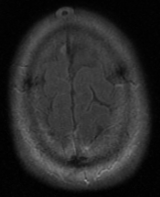

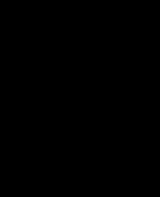

In [12]:
print(results.xyxy[0][0])
print(len(results.xyxy[0]))
w_h = results.xyxy[0][0]
w_h = list(map(int, w_h))
crop_img = img_test[w_h[1]:w_h[3], w_h[0]:w_h[2]]
crop_mask = mask_test[w_h[1]:w_h[3], w_h[0]:w_h[2]]
from google.colab.patches import cv2_imshow
cv2_imshow(crop_img)
cv2_imshow(crop_mask)


In [13]:
def Crop(img_path, mask_path):
  img_test = cv2.imread(str(img_path),  cv2.IMREAD_GRAYSCALE)
  mask_test = cv2.imread(str(mask_path),  cv2.IMREAD_GRAYSCALE)
  pre_img = model(img_test, size=512)
  #Crop
  if len(pre_img.xyxy[0]) > 0 : 
    w_h_img = pre_img.xyxy[0][0]
    w_h_img = list(map(int, w_h_img))

    crop_img = img_test[w_h_img[1]:w_h_img[3], w_h_img[0]:w_h_img[2]]
    crop_mask = mask_test[w_h_img[1]:w_h_img[3], w_h_img[0]:w_h_img[2]]

    return crop_img, crop_mask
  else: return img_test, mask_test


In [17]:
for i in range(len(train_files)):
  # img_path = df['image_path'][i]
  # mask_path = df['mask_path'][i]
  img_path = train_files[i]
  mask_path = mask_files[i]

  crop_img, crop_mask = Crop(img_path, mask_path)
  # name_img = img_path[:-4] + '_cropped.jpg'
  # name_mask = mask_path[:-4] + '_cropped.jpg'
  # print(name_img)
  # print(name_mask)

  cv2.imwrite(img_path, crop_img)
  cv2.imwrite(mask_path, crop_mask)